## MNIST machine learning exercise

In this exercise we will compare the performance of three different modeling approaches at predicting handwritten numbers. 

We use the MNIST data set;

![mnist data](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

## Load libraries

In [1]:
from __future__ import print_function
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

from sklearn import datasets


np.random.seed(1)

## Load data and explore/get to know the data structure



Load the MNIST digits dataset. It's originally from UCI machine learning library, but included in SKLearn.

In [2]:
mnist = datasets.load_digits() # sklearn includes this data set .. https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Notice that the dataset is stored in a dictionary

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Note thjat there are 1797 images.

In [4]:
print(len(mnist.data))

1797


Images are 8x8 grid of values epresenting the gray level for each pixel (16 levels of grey -- from 0 (black) to 15 (white)). 

In [5]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

To analyze this, we simple turn this into a one dimensional array (so we will x1, x2, ... x63, x64). This has already been done for us, and is stored in the data key.

In [6]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
print(mnist.target[0])
print(mnist.target[1])
print(mnist.target[2])
print(mnist.target[3])
print(mnist.target[4])
print(mnist.target[5])
print(mnist.target[6])

0
1
2
3
4
5
6


We can use matplotlib to display a sample of these images from the data.

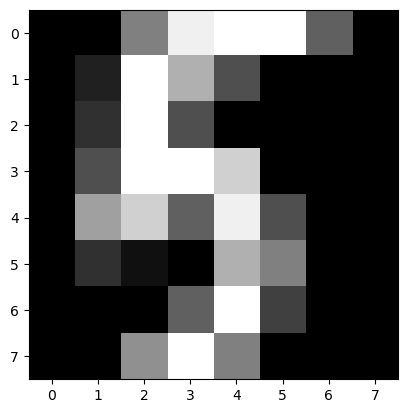

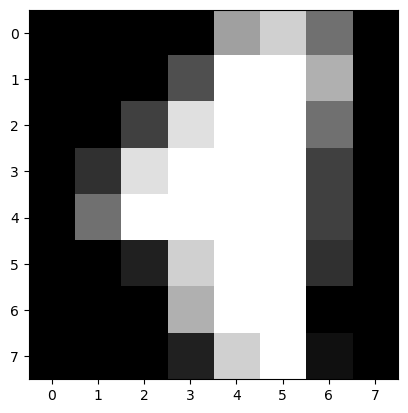

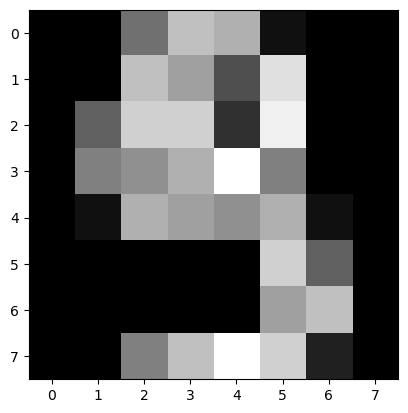

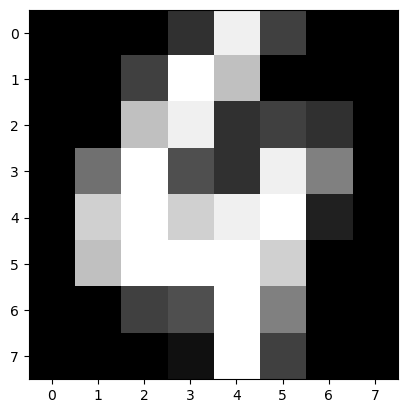

In [8]:
for i in np.random.choice(range(0,len(mnist.images)), 4): # choose 4 at random
  plt.imshow(mnist.images[i], cmap='gray')
  plt.show()

## Split data into training and test sets


In [9]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=1)

### Neural Net

In [10]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(60,50,40), solver='adam', max_iter=200)
_ = ann.fit(X_train, y_train)

Wall time: 1.5 s


In [11]:
%%time
y_pred = ann.predict(X_test)

Wall time: 2.94 ms


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       1.00      1.00      1.00        35
           2       0.97      1.00      0.99        36
           3       0.95      0.98      0.96        41
           4       0.95      0.97      0.96        38
           5       0.97      0.97      0.97        30
           6       1.00      1.00      1.00        37
           7       0.97      0.95      0.96        37
           8       0.96      0.93      0.95        29
           9       0.94      0.97      0.96        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



## With RandomizedSearchCV

In [13]:
%%time

score_measure = "accuracy"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (50,), (70,),(50,30), (40,20), (60,40, 20), (70,50,40)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .2, .5, .7, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1, 0.2, 0.5],
    'max_iter': [5000]
}

ann = MLPClassifier()
grid_search = RandomizedSearchCV(estimator = ann, param_distributions=param_grid, cv=kfolds, n_iter=100,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'solver': 'adam', 'max_iter': 5000, 'learning_rate_init': 0.001, 'learning_rate': 'constant', 'hidden_layer_sizes': (70,), 'alpha': 0.5, 'activation': 'tanh'}
Wall time: 2min 51s


In [14]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        36
           3       0.98      1.00      0.99        41
           4       1.00      1.00      1.00        38
           5       0.93      0.93      0.93        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.93      0.96        29
           9       0.94      0.97      0.96        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Wall time: 13.4 ms


## With GridSearchCV

In [20]:
%%time

score_measure = "accuracy"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (30,), (50,), (70,), (90,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [.5, .7, 1],
    'learning_rate': ['adaptive', 'invscaling'],
    'learning_rate_init': [0.005, 0.01, 0.15],
    'max_iter': [5000]
}

ann = MLPClassifier()
grid_search = GridSearchCV(estimator = ann, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
{'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': (90,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'max_iter': 5000, 'solver': 'adam'}
Wall time: 1min 21s


In [21]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       0.95      1.00      0.98        41
           4       0.97      1.00      0.99        38
           5       0.97      0.93      0.95        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      1.00      1.00        29
           9       0.97      0.97      0.97        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Wall time: 7.29 ms


In [22]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_reg_model = LogisticRegression(penalty='none',max_iter=1900)
_ = log_reg_model.fit(X_train, np.ravel(y_train,order='C'))

In [25]:
y_pred = log_reg_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      0.91      0.94        35
           2       1.00      1.00      1.00        36
           3       0.98      0.98      0.98        41
           4       0.93      1.00      0.96        38
           5       0.88      0.93      0.90        30
           6       1.00      1.00      1.00        37
           7       1.00      0.95      0.97        37
           8       0.90      0.93      0.92        29
           9       0.97      0.94      0.96        34

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



# Random search Logistic regression

In [27]:
#random search in log
score_measure = "accuracy"
kfolds = 15

param_grid = {
    'C':[0.1,1,10,100],
    'penalty': ['l2'],
    'solver': ['liblinear']
    
}

logreg_rand = LogisticRegression()

rand_search_log = RandomizedSearchCV(estimator = logreg_rand, param_distributions=param_grid, cv=kfolds, n_iter=1900,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search_log.fit(X_train,np.ravel(y_train,order='C'))

print(f"The best {score_measure} score is {rand_search_log.best_score_}")
print(f"... with parameters: {rand_search_log.best_params_}")

bestRecallTree = rand_search_log.best_estimator_

c:\Users\mukes\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=1900. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 15 folds for each of 4 candidates, totalling 60 fits
The best accuracy score is 0.9610014619883042
... with parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}


In [29]:
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      0.97      0.99        35
           2       1.00      1.00      1.00        36
           3       1.00      0.98      0.99        41
           4       0.95      1.00      0.97        38
           5       0.91      0.97      0.94        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       0.96      0.93      0.95        29
           9       0.91      0.94      0.93        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360



# Grid search for logistic 

In [30]:
#grid search in log
score_measure = "precision"
kfolds = 5

param_grid = {
    'C':[0.1,1,10,100],
    'penalty': ['l1'],
    'solver': ['liblinear']
    
}

logreg_grid = LogisticRegression()
grid_search_log = GridSearchCV(logreg_grid, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search_log.fit(X_train,y_train)

print(f"The best {score_measure} score is {grid_search_log.best_score_}")
print(f"... with parameters: {grid_search_log.best_params_}")

bestRecallTree = grid_search_log.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
The best precision score is nan
... with parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


c:\Users\mukes\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(
c:\Users\mukes\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan]
  warnings.warn(


In [31]:
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      0.94      0.97        35
           2       1.00      1.00      1.00        36
           3       1.00      0.98      0.99        41
           4       0.97      1.00      0.99        38
           5       0.91      0.97      0.94        30
           6       0.97      1.00      0.99        37
           7       0.97      0.97      0.97        37
           8       0.93      0.97      0.95        29
           9       0.94      0.91      0.93        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



When compared between the models the accuracy score for nueral networks was 0.99 grid search  but for the random search and grid search was about 0.96 and 0.97 respectively so nueral networks is better performing than logistic regression.